### Charger le modèle et les données

In [ ]:
from ultralytics import YOLO

In [ ]:
import os

data_path = "../data/data.yaml"  # Chemin relatif

if not os.path.exists(data_path):
    raise FileNotFoundError(f"Le fichier data.yaml est introuvable à {data_path}")

print("Fichier trouvé")

### Entrainement du modèle avec une ligne de commande

In [ ]:
!! yolo task=detect mode=train model=yolov8s.pt data=D:/projects_2025/m2_SISE_Deep_Learning/data/data.yaml epochs=100 pretrained=True mosaic=1.0 hsv_h=0.05 hsv_s=0.8 hsv_v=0.6 fliplr=0.5 project=D:/projects_2025/m2_SISE_Deep_Learning/model_yolov8s_n100


### Entrainement du modèle avec python

In [ ]:
from ultralytics import YOLO

# Charger le modèle YOLOv8 pré-entraîné 
model = YOLO("yolo11n.pt")  # Modèle nano, ou remplacer par "yolov8s.pt" si nécessaire

# Entraînement avec des paramètres adaptés aux petits datasets
model.train(
    data="D:/projects_2025/m2_SISE_Deep_Learning/data/data.yaml",  # Dataset
    epochs=100,  
    batch=8, 
    imgsz=640,  
    pretrained=True, 
    project="D:/projects_2025/m2_SISE_Deep_Learning/model_yolov11n_n100",
    optimizer="AdamW",  # Améliore l'entraînement sur petits datasets
    lr0=0.001,  # Apprentissage plus lent pour éviter overfitting
    patience=20,
    augment=True, 
    mosaic=1.0, 
    hsv_h=0.05, hsv_s=0.8, hsv_v=0.6,  # Variations de couleur
    fliplr=0.5  
)



### Tester le modèle avec des nouvelles images


image 1/1 d:\projects_2025\m2_SISE_Deep_Learning\model\..\test3.jpeg: 448x640 3 sushis, 102.7ms
Speed: 0.0ms preprocess, 102.7ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict24


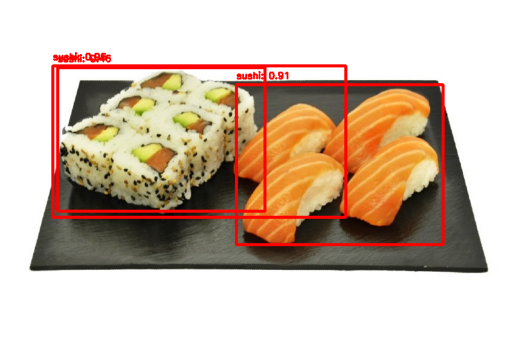

In [23]:
import cv2
import matplotlib.pyplot as plt

# Charger le modèle YOLO entraîné
model = YOLO("../model_yolov11n_n100/train/weights/best.pt")

# Charger une image
image_path = "../test3.jpeg"
results = model.predict(image_path, save=True, show=False)  

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir pour l'affichage avec matplotlib

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Coordonées des boîtes
        class_id = int(box.cls[0])  # Identifiant de la classe
        confidence = box.conf[0].item()  # Confiance de la prédiction
        label = f"{model.names[class_id]}: {confidence:.2f}"  # Nom de la classe + confiance

        # Dessiner la boîte sur l'image
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

plt.imshow(img)
plt.axis("off")
plt.show()
